In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import git
import pandas as pd
import matplotlib.pyplot as plt
repo = git.Repo("./", search_parent_directories=True)
homedir = repo.working_dir
datadir = f"{homedir}/data/"
df_cases = pd.read_csv(datadir + 'us/covid/confirmed_cases.csv')
df_deaths = pd.read_csv(datadir + 'us/covid/deaths.csv')

In [3]:
from scipy.special import erf
from scipy.optimize import least_squares

In [4]:
import numpy as np

# Erf regression

In [5]:
def model(t, params):
    return params[0] * (1+erf(params[1]*(t-params[2])))

In [99]:
def residual(params, window):
    return model(t_vec[:-window], params) - data[t_vec[:-window]]

In [7]:
df_deaths.head()

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,3,3,3,3,4,4,4,4,4,4
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,4,5,5,5,5,5,5,6,7,7
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1


In [8]:
df_deaths = df_deaths.set_index('countyFIPS')

In [9]:
df_deaths.head()

,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
countyFIPS,,,,,,,,,,,,,,,,,,,,,
0,Statewide Unallocated,AL,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,Autauga County,AL,1,0,0,0,0,0,0,0,...,3,3,3,3,4,4,4,4,4,4
1003,Baldwin County,AL,1,0,0,0,0,0,0,0,...,4,5,5,5,5,5,5,6,7,7
1005,Barbour County,AL,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1007,Bibb County,AL,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1


In [10]:
df_deaths.sort_values(by='5/3/20',ascending=False).head(20)

,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
countyFIPS,,,,,,,,,,,,,,,,,,,,,
36047,Kings County,NY,36,0,0,0,0,0,0,0,...,5678,5745,5753,5850,5902,5975,6003,6024,6064,6107
36081,Queens County,NY,36,0,0,0,0,0,0,0,...,5433,5460,5609,5671,5717,5777,5791,5820,5851,5878
36005,Bronx County,NY,36,0,0,0,0,0,0,0,...,3642,3671,3711,3747,3784,3837,3847,3867,3887,3915
36061,New York County,NY,36,0,0,0,0,0,0,0,...,2220,2260,2368,2399,2412,2449,2455,2471,2485,2501
26163,Wayne County,MI,26,0,0,0,0,0,0,0,...,1924,1945,1973,2012,2028,2082,2097,2105,2140,2156
17031,Cook County,IL,17,0,0,0,0,0,0,0,...,1802,1922,2004,2110,2197,2264,2317,2361,2449,2589
36059,Nassau County,NY,36,0,0,0,0,0,0,0,...,1792,1818,1891,1904,1918,1940,1963,1973,1991,2004
1,New York City Unallocated/Probable,NY,36,0,0,0,0,0,0,0,...,1340,1304,1235,1153,1072,974,873,811,816,726
34013,Essex County,NJ,34,0,0,0,0,0,0,0,...,1292,1319,1349,1381,1398,1414,1423,1426,1444,1471


In [11]:
data = df_deaths.loc[36081,'1/22/20':].astype(int).values

In [12]:
data

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,   21,   40,   60,   92,  124,  149,
        216,  253,  305,  376,  447,  499,  590,  685,  813,  948, 1129,
       1344, 1400, 1759, 1848, 2116, 2116, 2948, 3208, 3358, 3426, 3466,
       3878, 4026, 4204, 4345, 4463, 4571, 4723, 4800, 4870, 4983, 5070,
       5150, 5204, 5279, 5385, 5433, 5460, 5609, 5671, 5717, 5777, 5791,
       5820, 5851, 5878])

In [13]:
t_vec = list(range(len(data)))

In [14]:
t_vec[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [23]:
guesses = np.array([2500, 0.1, 70]) # half peak, max slope, max slope time

In [16]:
guesses # parameters for the erf function

array([2.5e+03, 1.0e-01, 7.0e+01])

In [17]:
model(t_vec, guesses)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.77555756e-13,
       5.55111512e-13, 1.94289029e-12, 5.82867088e-12, 1.83186799e-11,
       5.57887070e-11, 1.65423231e-10, 4.81281681e-10, 1.37334588e-09,
       3.84359211e-09, 1.05473963e-08, 2.83803536e-08, 7.48814899e-08,
       1.93740024e-07, 4.91540142e-07, 1.22292759e-06, 2.98367941e-06,
       7.13873544e-06, 1.67500691e-05, 3.85431448e-05, 8.69806216e-05,
       1.92509819e-04, 4.17877645e-04, 8.89657482e-04, 1.85774593e-03,
       3.80498341e-03, 7.64427449e-03, 1.50644029e-02, 2.91216434e-02,
       5.52262425e-02, 1.02744695e-01, 1.87532987e-01, 3.35831850e-01,
       5.90086041e-01, 1.01738004e+00, 1.72128474e+00, 2.85794149e+00,
       4.65711574e+00, 7.44866664e+00, 1.16943375e+01, 1.80239269e+01,
       2.72737459e+01, 4.05238535e+01, 5.91290416e+01, 8.47371338e+01,
      

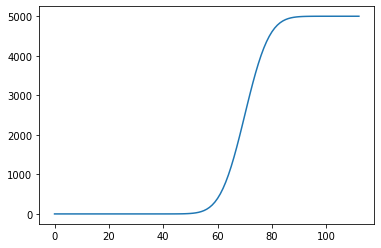

In [18]:
plt.plot(model(t_vec, guesses))

In [19]:
res = least_squares(residual, x0=guesses, args=(28, ))

In [20]:
res.x

array([2.02098830e+04, 4.50057055e-02, 1.06335200e+02])

NameError: name 't_max' is not defined

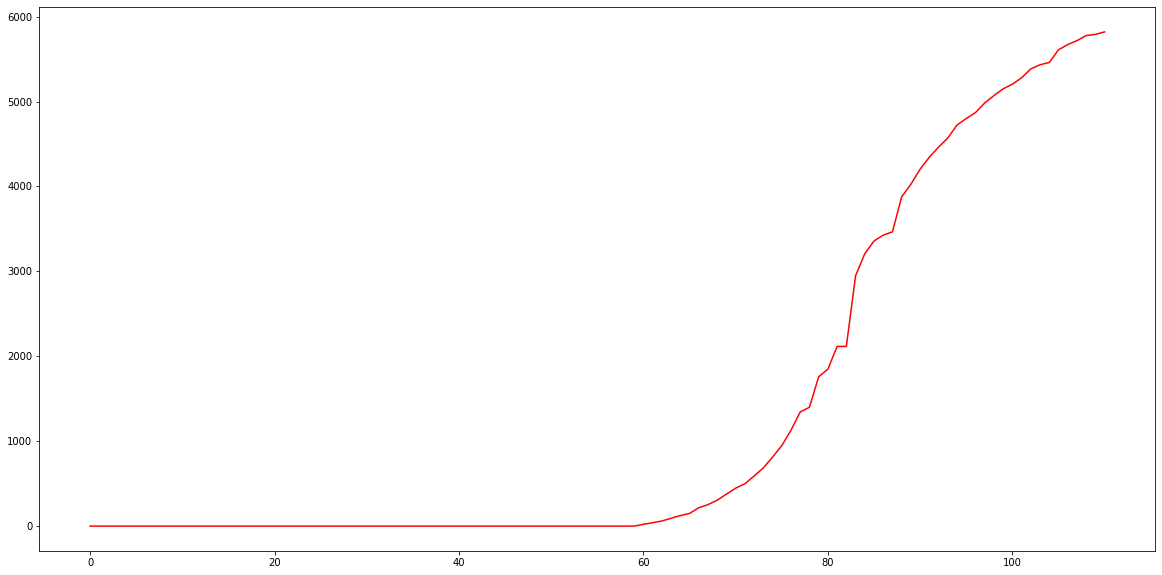

In [26]:
plt.figure(figsize=(20,10))
plt.plot(data, c='r')
for w in range(3, 28, 1):
    res = least_squares(residual, x0=guesses, args=(w, ))
    plt.plot(model(t_max, res.x), c='k', alpha=1/w+.1)
plt.show()

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


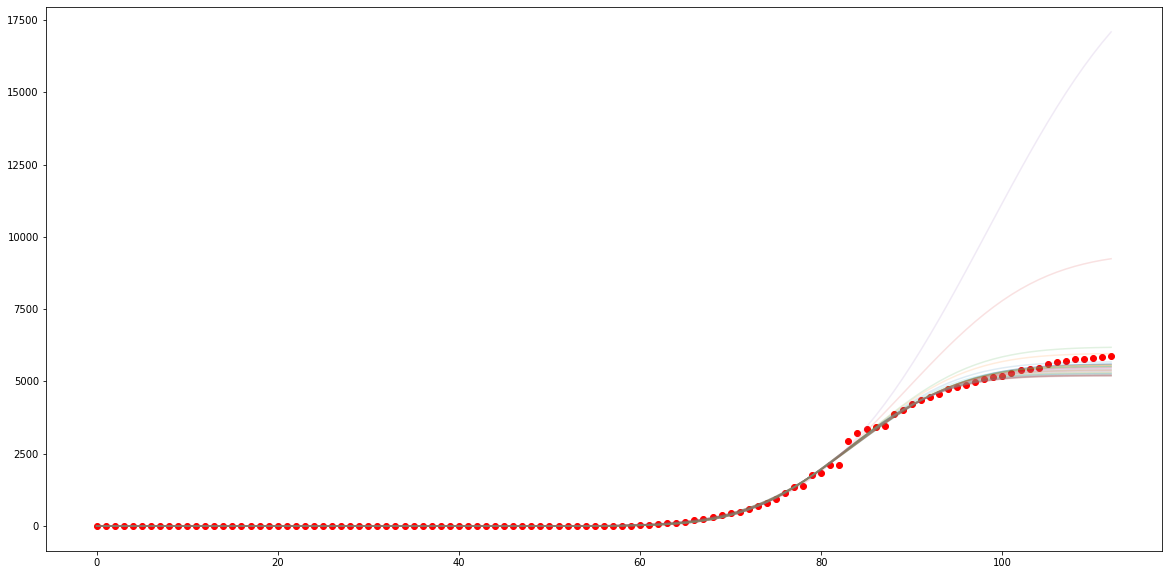

In [21]:
plt.figure(figsize=(20,10))
plt.plot(data, 'ro')
for w in range(3, 28, 1):
    print(w)
    res = least_squares(residual, x0=guesses, args=(w, ))
    plt.plot(model(t_vec, res.x), alpha=1/w+.1)
plt.show()

In [22]:
res.x

array([1.01937067e+04, 5.09979511e-02, 9.83258533e+01])

# Gaussian Process

In [27]:
import pymc3 as pm
import arviz as az

In [24]:
means=[8.25561133e+02, 1.00337817e-01, 7.43814888e+01]

In [ ]:
# how was mean estimated?

In [ ]:
# does the erf function needs to start low?

In [25]:
data[:-28]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,   21,   40,   60,   92,  124,  149,
        216,  253,  305,  376,  447,  499,  590,  685,  813,  948, 1129,
       1344, 1400, 1759, 1848, 2116, 2116, 2948, 3208])

In [30]:
#t_vec

In [40]:
with pm.Model() as erf_model:
    
    β = pm.Normal('β', mu=means[0], sigma=means[0]/10)
    γ = pm.Normal('γ', mu=means[1], sigma=means[1]/10)
    t_int = pm.Normal('t0', mu=means[2], sigma=means[2]/10)
    σ = pm.HalfNormal('σ', sigma=10) # overall noise
    μ = β * (1 + pm.math.erf(γ * (t_vec[:-14] - t_int))) # beta: 1/2 of almost stable death
    
    positive = pm.Normal('positive', mu=μ, sigma=σ, observed=data[:-14])


In [41]:
with erf_model:
    trace = pm.sample(1000, tune=2000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, t0, γ, β]
Sampling 2 chains, 0 divergences: 100%|██████████| 6000/6000 [00:11<00:00, 529.56draws/s]


In [ ]:
# each trace a function? 

/Users/niyuli/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/niyuli/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/niyuli/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/niyuli/opt/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_

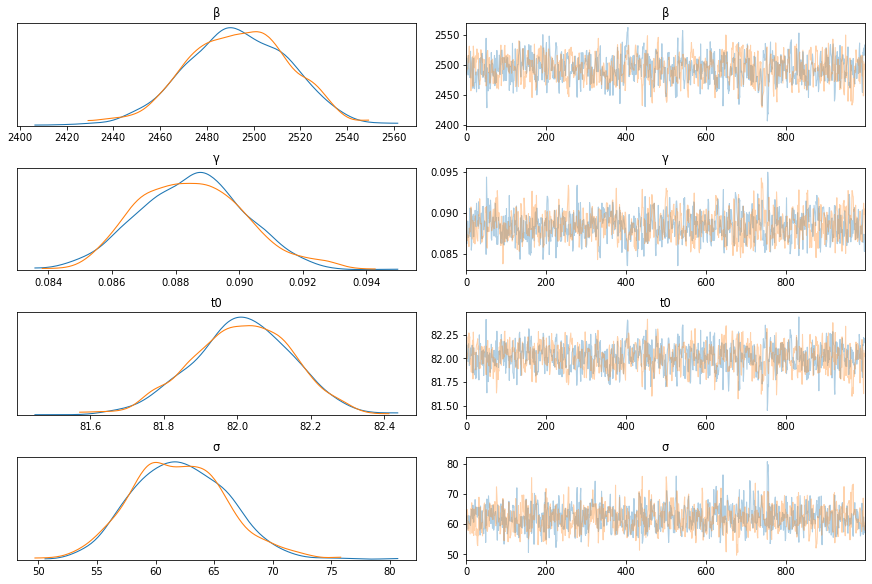

In [42]:
az.plot_trace(trace);

In [32]:
trace

<MultiTrace: 2 chains, 1000 iterations, 5 variables>

In [52]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
β,2493.294,21.874,2454.874,2534.749,0.782,0.553,782.0,782.0,786.0,919.0,1.0
γ,0.089,0.002,0.086,0.092,0.000,0.000,837.0,835.0,845.0,922.0,1.0
t0,82.012,0.135,81.766,82.268,0.005,0.003,831.0,831.0,832.0,926.0,1.0
σ,62.122,4.041,55.196,69.866,0.125,0.089,1047.0,1029.0,1057.0,1229.0,1.0


In [53]:
# Get the values mean if need just one output rather than a whole

In [59]:
trace.get_values('β').mean()

2493.2938188395824

In [60]:
# vs the original dialed in prior parameters

means

[825.561133, 0.100337817, 74.3814888]

<Figure size 1440x720 with 0 Axes>

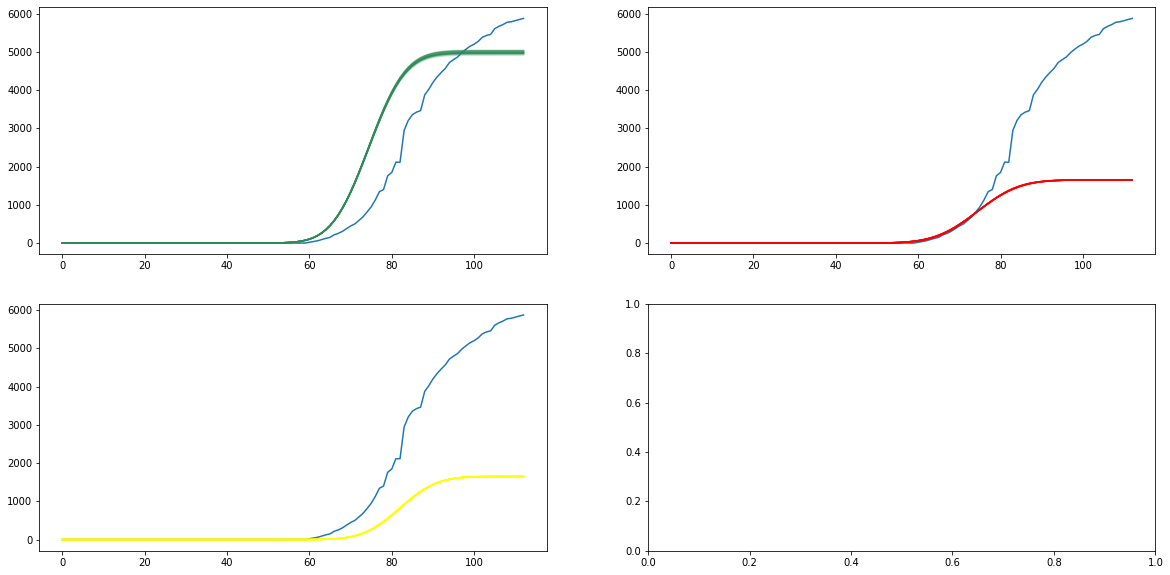

In [43]:
plt.figure(figsize=(20,10))
fig, axs = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(20)

axs[0, 0].plot(t_vec, data) #ground truth
for beta in trace['β'][:20]:
    axs[0, 0].plot(t_vec, beta * (1 + erf(means[1] * (np.array(t_vec) - means[2]))), alpha=0.3, color='seagreen')
axs[0, 1].plot(t_vec, data)
for gamma in trace['γ'][:20]:
    axs[0, 1].plot(t_vec, means[0] * (1 + erf(gamma * (np.array(t_vec) - means[2]))), alpha=0.3, color='red')
axs[1, 0].plot(t_vec, data)
for t_int in trace['t0'][:20]:
    axs[1, 0].plot(t_vec, means[0] * (1 + erf(means[1] * (np.array(t_vec) - t_int))), alpha=0.3, color='yellow')
plt.show()

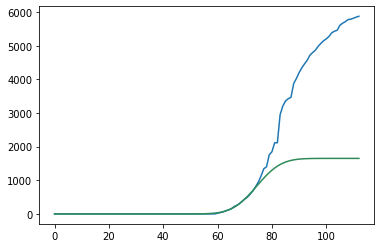

In [44]:
# regression based
plt.plot(t_vec, data)
plt.plot(t_vec, means[0] * (1 + erf(means[1] * (np.array(t_vec) - means[2]))), color='seagreen')

In [48]:
trace[2]

{'β': 2491.15842219374,
 'γ': 0.0876374952395424,
 't0': 82.05431214886606,
 'σ_log__': 4.169062338842605,
 'σ': 64.6547993819749}

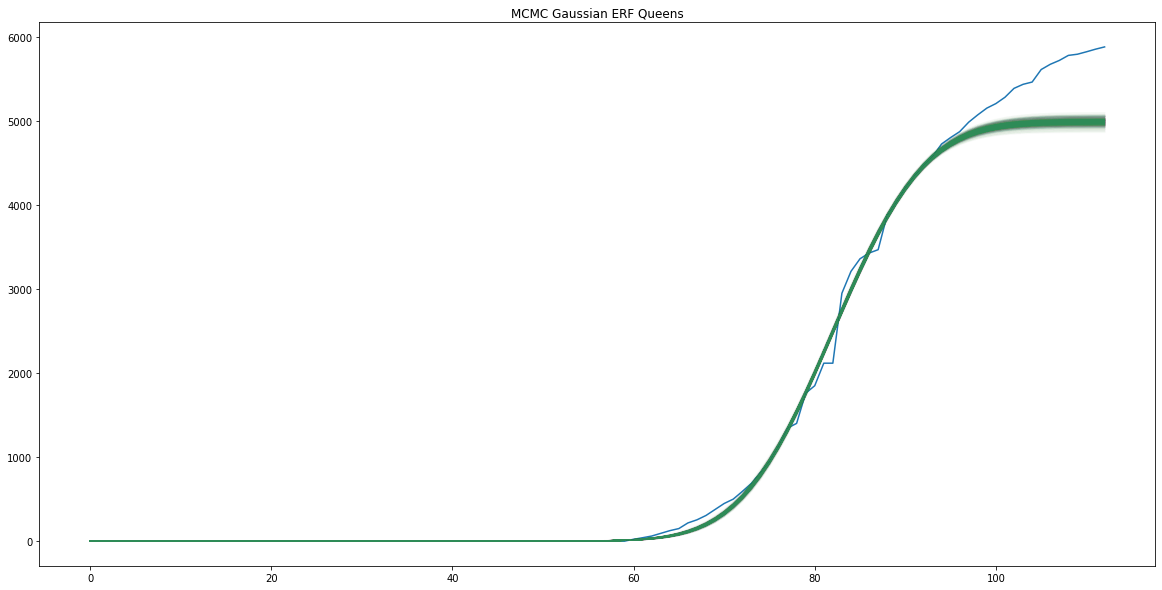

In [51]:
# mcmc based
plt.figure(figsize=(20,10))
plt.plot(t_vec, data)
plt.title('MCMC Gaussian ERF Queens')
# ax.set_ylim(0, None)
for t in trace:
    plt.plot(t_vec, t['β'] * (1 + erf(t['γ'] * (np.array(t_vec) - t['t0']))), alpha=0.008, color='seagreen')
plt.savefig("1day.png")

# Test the other high death regions

In [61]:
from utility import correct_FIPS # Juhyun's utiliy function to transform 

In [62]:
NYT = pd.read_csv(f"{homedir}/data/us/covid/nyt_us_counties.csv")

In [63]:
NYT.loc[(NYT.county == 'New York City'), ['fips']] = 36061 #manual imbue NYC

In [64]:
NYT_notna = NYT[NYT["fips"].notna()]
NYT_notna["fips"] = NYT_notna["fips"].apply(correct_FIPS)
NYT_notna.head()

/Users/niyuli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0
1,2020-01-22,Snohomish,Washington,53061,1,0
2,2020-01-23,Snohomish,Washington,53061,1,0
3,2020-01-24,Cook,Illinois,17031,1,0
4,2020-01-24,Snohomish,Washington,53061,1,0


In [65]:
NYT_notna.shape

(139876, 6)

In [66]:
len(NYT_notna['fips'].unique())

2891

In [67]:
NYT_notna['date'] = pd.to_datetime(NYT_notna['date'].values)

/Users/niyuli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
NYT_notna.dtypes

date      datetime64[ns]
county            object
state             object
fips              object
cases              int64
deaths             int64
dtype: object

In [76]:
grouptime = NYT_notna.groupby('fips')['date'].min()

In [85]:
NYT_notna.shape

(139876, 6)

In [ ]:
# Get common start frame

In [69]:
def select_county_by_fips(df,fips):
    '''
    Return a selected dp by entering fips
    '''
    
    
    return df.loc[df['fips']==fips]

In [87]:
def get_fips_with_n_deaths(df, date, death_thresh):
    '''
    get distinct fips for counties with more than n deaths on a certain day
    '''
    tmp_df = df.loc[(df['date']==date) & (df['deaths'] > death_thresh)]
    
    return tmp_df

# Train with Country with > 50 deaths by April

In [88]:
high_death_fips= set(get_fips_with_n_deaths(NYT_notna, 
                                            date = '2020-04-28', death_thresh = 50)['fips'].values)

In [90]:
len(high_death_fips)

121

In [89]:
low_death_fips = set(NYT_notna['fips'].values) - high_death_fips

In [91]:
len(low_death_fips)

2770

In [92]:
# change back to list structure

high_death_fips = list(high_death_fips)

In [93]:
low_death_fips = list(low_death_fips)

In [ ]:
# get the high death county predictions

In [98]:
means=[8.25561133e+02, 1.00337817e-01, 7.43814888e+01]

In [ ]:
#select_county_by_fips

#select_county_by_fips(NYT_notna, fips = '17031')['deaths'].values

In [139]:
fips2countyDic = {}

for fip in high_death_fips:
        
    fips2countyDic[fip] = NYT_notna.loc[(NYT_notna['date'] == '2020-04-28') &
                                                       (NYT_notna['fips'] == fip)].iloc[0]['county']

In [140]:
fips2countyDic

{'06085': 'Santa Clara',
 '08123': 'Weld',
 '18089': 'Lake',
 '26049': 'Genesee',
 '34029': 'Ocean',
 '32003': 'Clark',
 '34003': 'Bergen',
 '42071': 'Lancaster',
 '51059': 'Fairfax',
 '17097': 'Lake',
 '22017': 'Caddo',
 '44007': 'Providence',
 '25009': 'Essex',
 '08001': 'Adams',
 '06071': 'San Bernardino',
 '20209': 'Wyandotte',
 '06037': 'Los Angeles',
 '26161': 'Washtenaw',
 '22051': 'Jefferson',
 '12099': 'Palm Beach',
 '13135': 'Gwinnett',
 '24510': 'Baltimore city',
 '25017': 'Middlesex',
 '06001': 'Alameda',
 '25013': 'Hampden',
 '09009': 'New Haven',
 '36029': 'Erie',
 '25025': 'Suffolk',
 '39099': 'Mahoning',
 '25021': 'Norfolk',
 '34005': 'Burlington',
 '34039': 'Union',
 '13121': 'Fulton',
 '13067': 'Cobb',
 '24003': 'Anne Arundel',
 '42079': 'Luzerne',
 '48113': 'Dallas',
 '51087': 'Henrico',
 '29510': 'St. Louis city',
 '34037': 'Sussex',
 '22033': 'East Baton Rouge',
 '18081': 'Johnson',
 '09003': 'Hartford',
 '21111': 'Jefferson',
 '22103': 'St. Tammany',
 '09005': 'Li

In [111]:
prediction_high_death_dic = {}

for fip_i in range(10):
    
    fip = high_death_fips[fip_i]
    
    dData = select_county_by_fips(NYT_notna, fips = '17031')['deaths'].values # deatths
    t_vec = list(range(len(dData)))
    
    with pm.Model() as erf_model:

        β = pm.Normal('β', mu=means[0], sigma=means[0]/10)
        γ = pm.Normal('γ', mu=means[1], sigma=means[1]/10)
        t_int = pm.Normal('t0', mu=means[2], sigma=means[2]/10)
        σ = pm.HalfNormal('σ', sigma=10) # overall noise
        μ = β * (1 + pm.math.erf(γ * (t_vec[:-2] - t_int))) # beta: 1/2 of almost stable death

        positive = pm.Normal('positive', mu=μ, sigma=σ, observed=dData[:-2])
        
    with erf_model:
        trace = pm.sample(1000, tune=2000, cores=2)  
        
    prediction_high_death_dic[fip] = [len(dData), trace.get_values('β').mean(),
                                     trace.get_values('γ').mean(), trace.get_values('t0').mean()]  

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, t0, γ, β]
Sampling 2 chains, 0 divergences: 100%|██████████| 6000/6000 [00:12<00:00, 462.20draws/s]
The acceptance probability does not match the target. It is 0.6688993912538328, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.6937419265282986, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, t0, γ, β]
Sampling 2 chains, 0 divergences: 100%|██████████| 6000/6000 [00:11<00:00, 533.25draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, t0, γ, β]
Sampling 2 chains, 0 diver

In [112]:
prediction_high_death_dic['06085']

[111, 1373.2494199489606, 0.047252994327388505, 93.43469858674825]

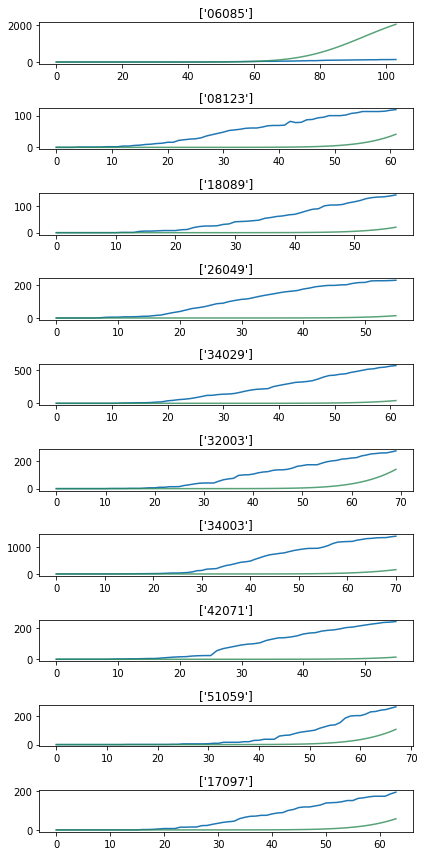

In [113]:
figure, axes = plt.subplots(nrows=10, ncols=1 ,figsize=(6,12))
#figure(figsize = [12,12])

for i, (k, v) in enumerate(prediction_high_death_dic.items()):
        
    #axes[i].plot(v)
    
    dData = select_county_by_fips(NYT_notna, fips = k)['deaths'].values # deatths
    t_vec = list(range(len(dData)))
    
    axes[i].plot(t_vec, dData)
    #plt.title('MCMC Gaussian ERF Queens')
    # ax.set_ylim(0, None)

    axes[i].plot(t_vec, v[1] * (1 + erf(v[2] * (np.array(t_vec) - v[3]))), 
                 alpha=0.8, color='seagreen')

    
    #axes[i].set_ylim([0, 20000]) 
    #axes[i%10, i//10].set_yscale('log')
    # get county name in str
    #axes[i].set_title(fips2countyDic[k])
    axes[i].set_title([k])
    #print(i, k)

figure.tight_layout()
#plt.savefig('foo.png', bbox_inches='tight')

# Not good, retry with Cauchy?

In [127]:
means = [825.561133, 0.100337817, 60.3814888]

In [143]:
prediction_high_death_dic = {}
# go with all 
for fip_i in range(len(high_death_fips)):
    
    fip = high_death_fips[fip_i]
    
    dData = select_county_by_fips(NYT_notna, fips = '17031')['deaths'].values # deatths
    t_vec = list(range(len(dData)))
    
    with pm.Model() as erf_model:

        β = pm.Cauchy('β', alpha=means[0], beta=means[0]/10)
        γ = pm.Cauchy('γ', alpha=means[1], beta=means[1]/10)
        t_int = pm.Cauchy('t0', alpha=means[2], beta=means[2]/10)
        σ = pm.HalfNormal('σ', sigma=10) # overall noise
        μ = β * (1 + pm.math.erf(γ * (t_vec[:-2] - t_int))) # beta: 1/2 of almost stable death

        positive = pm.Normal('positive', mu=μ, sigma=σ, observed=dData[:-2])
        
    with erf_model:
        trace = pm.sample(2000, tune=4000, cores=2)  
    
    try:
        prediction_high_death_dic[fip] = [len(dData), trace.get_values('β').mean(),
                                     trace.get_values('γ').mean(), trace.get_values('t0').mean()] 
    except:
        print('ERROR IN', fip, 'OOPS')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, t0, γ, β]
Sampling 2 chains, 0 divergences: 100%|██████████| 12000/12000 [00:19<00:00, 618.74draws/s]
The acceptance probability does not match the target. It is 0.6422466250753348, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, t0, γ, β]
Sampling 2 chains, 0 divergences: 100%|██████████| 12000/12000 [00:21<00:00, 563.64draws/s]
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, t0, γ, β]
Sampling 2 chains, 1 divergences: 100%|██████████| 12000/12000 [00:29<00:00, 411.24draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
T

Sampling 2 chains, 0 divergences: 100%|██████████| 12000/12000 [00:20<00:00, 573.57draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, t0, γ, β]
Sampling 2 chains, 0 divergences: 100%|██████████| 12000/12000 [00:22<00:00, 534.35draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, t0, γ, β]
Sampling 2 chains, 0 divergences: 100%|██████████| 12000/12000 [00:26<00:00, 451.49draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, t0, γ, β]
Sampling 2 chains, 41 divergences: 100%|██████████| 12000/12000 [00:23<00:00, 514.33draws/s]
There were 41 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.3744826432865811, but should be close to 0.8. Try to increase the nu

NUTS: [σ, t0, γ, β]
Sampling 2 chains, 0 divergences: 100%|██████████| 12000/12000 [00:23<00:00, 512.74draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, t0, γ, β]
Sampling 2 chains, 0 divergences: 100%|██████████| 12000/12000 [00:18<00:00, 637.60draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, t0, γ, β]
Sampling 2 chains, 0 divergences: 100%|██████████| 12000/12000 [00:19<00:00, 617.99draws/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, t0, γ, β]
Sampling 2 chains, 0 divergences: 100%|██████████| 12000/12000 [00:19<00:00, 600.57draws/s]
The acceptance probability does not match the target. It is 0.8899835582175337, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller 

RuntimeError: Chain 1 failed.

In [129]:
#help(pm.Normal)

In [144]:
len(prediction_high_death_dic)

53

In [136]:
prediction_high_death_dic['06085']

[111, 1438.172572335406, 0.04522562199346259, 94.46918899383863]

In [130]:
#help(pm.Cauchy)

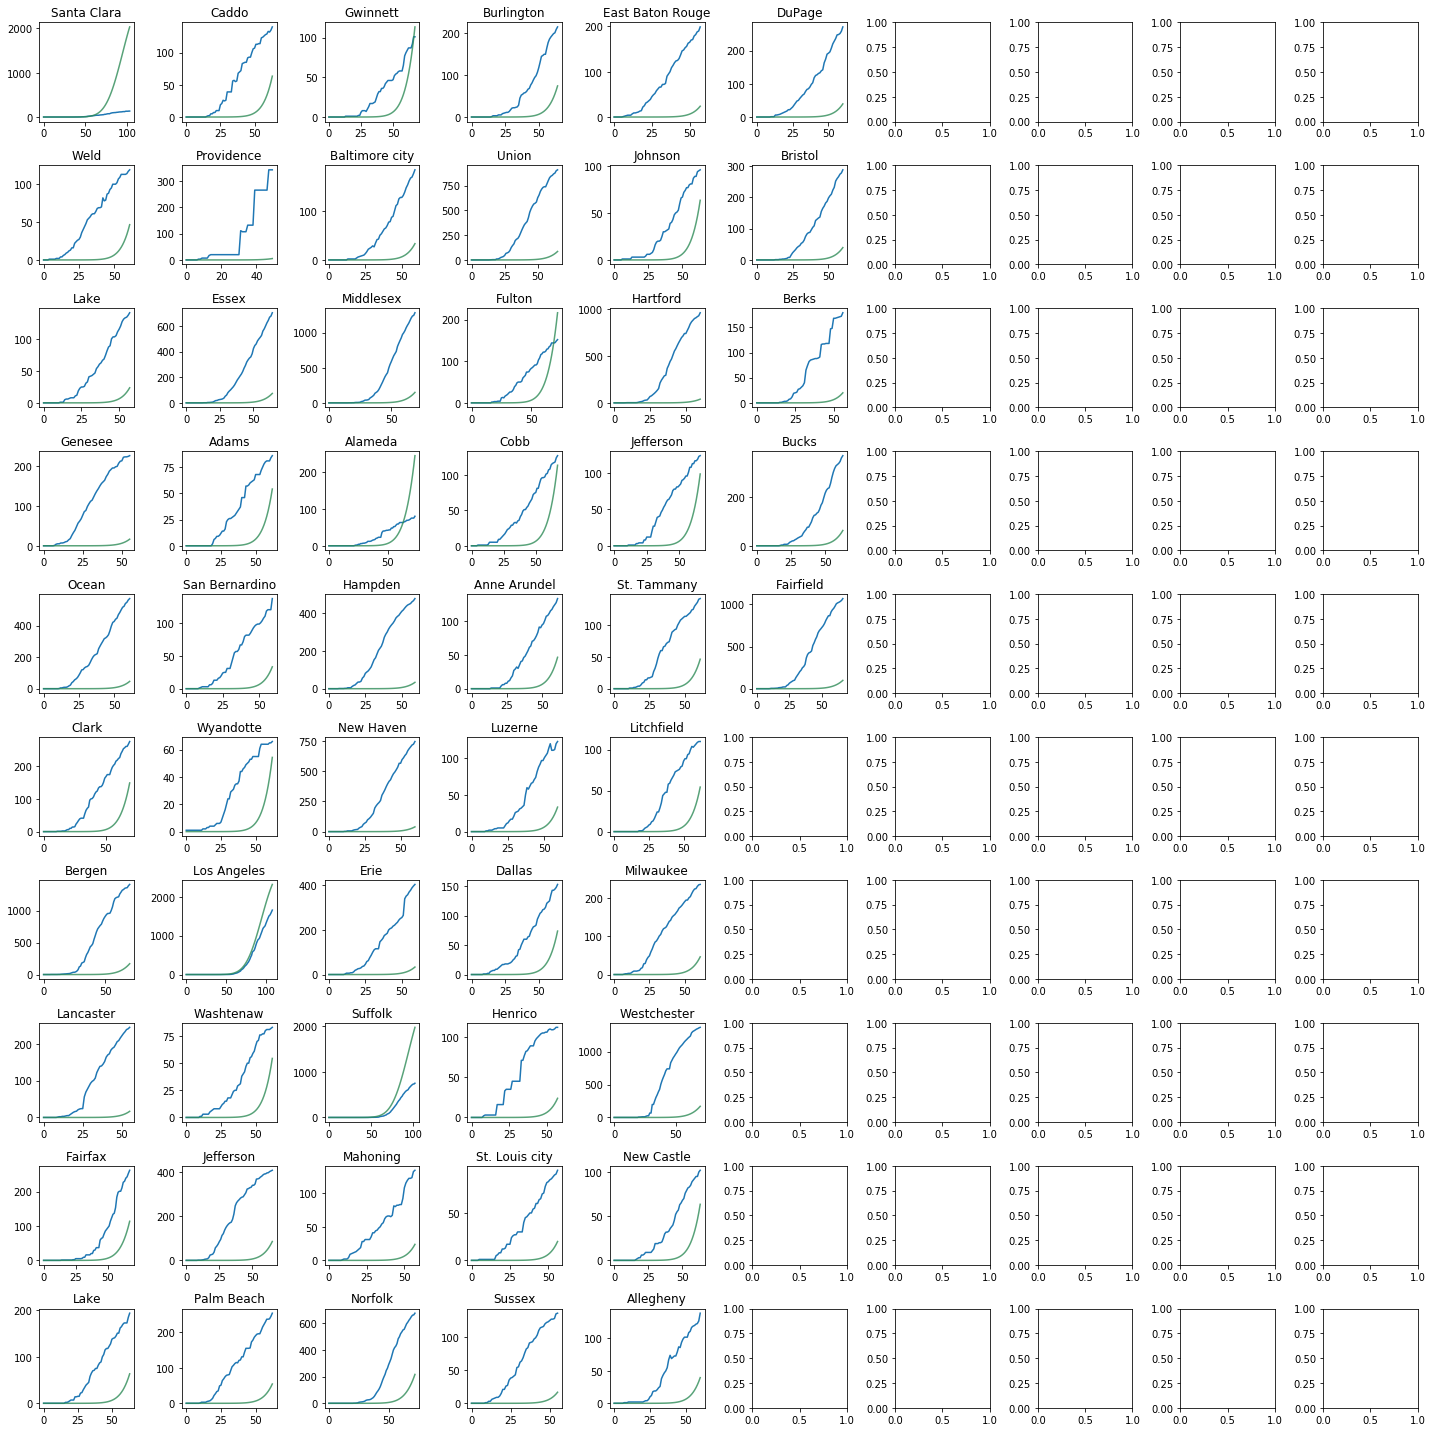

In [142]:
figure, axes = plt.subplots(nrows=10, ncols=10 ,figsize=(20,20))
#figure(figsize = [12,12])

for i, (k, v) in enumerate(prediction_high_death_dic.items()):
        
    #axes[i].plot(v)
    
    dData = select_county_by_fips(NYT_notna, fips = k)['deaths'].values # deatths
    t_vec = list(range(len(dData)))
    
    axes[i%10, i//10].plot(t_vec, dData)
    #plt.title('MCMC Gaussian ERF Queens')
    # ax.set_ylim(0, None)

    axes[i%10, i//10].plot(t_vec, v[1] * (1 + erf(v[2] * (np.array(t_vec) - v[3]))), 
                 alpha=0.8, color='seagreen')

    
    #axes[i].set_ylim([0, 20000]) 
    #axes[i%10, i//10].set_yscale('log')
    # get county name in str
    axes[i%10, i//10].set_title(fips2countyDic[k])
    #axes[i].set_title([k])
    #print(i, k)

figure.tight_layout()
#plt.savefig('foo.png', bbox_inches='tight')

In [ ]:
# retry with > 100 high states

In [ ]:
figure, axes = plt.subplots(nrows=10, ncols=10 ,figsize=(20,25))
#figure(figsize = [12,12])
i = 0
while i < 10:
    for i, (k, v) in enumerate(prediction_high_death_dic.items()):
        
        axes[i%10, i//10].plot(v)
        axes[i%10, i//10].set_ylim([0, 20000]) 
        #axes[i%10, i//10].set_yscale('log')
        # get county name in str
        axes[i%10, i//10].set_title(fips2countyDic[k])
        #print(i, k)
        
    i= i+1
figure.tight_layout()
plt.savefig('foo.png', bbox_inches='tight')